### Урок 5. Домашняя работа

Есть два набора точек - *x_hw* и *y_hw*. В рамках домашней работы нужно
* визуализировать набор точек
* найти коэффициенты регрессии $w_0, w_1$ по шагам, как в уроке
* посчитать предсказание в виде $\hat{y} = w_0 + w_1x$ и визуализировать его вместе с точками *x_hw* и *y_hw*

In [245]:
# vaiant 1

In [246]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from numpy.linalg import inv

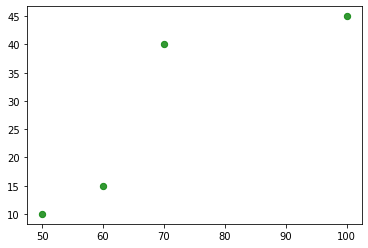

In [247]:
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]
plt.scatter(x_hw, y_hw, 40, 'g', 'o', alpha=0.8)
plt.show()

In [248]:
X=np.array([[1,50], [1,60], [1, 70], [1, 100]])
X

array([[  1,  50],
       [  1,  60],
       [  1,  70],
       [  1, 100]])

In [249]:
y=np.array([[10], [15], [40], [45]])
y

array([[10],
       [15],
       [40],
       [45]])

In [250]:
X_T_X=(X.T).dot(X) #X^T*X
X_T_X

array([[    4,   280],
       [  280, 21000]])

In [251]:
X_T_X_Inverted=inv(X_T_X) # (X^T*X)^-1
X_T_X_Inverted

array([[ 3.75000000e+00, -5.00000000e-02],
       [-5.00000000e-02,  7.14285714e-04]])

In [252]:
w=X_T_X_Inverted.dot(X.T).dot(y) # (𝑋^𝑇*𝑋)^−1*𝑋^𝑇*𝑌
print("w_1=%.5f, w_2=%.3f" % (w[0][0],w[1][0]))
#w.reshape(-1)



w_1=-22.50000, w_2=0.714


In [253]:
# y=-22.5x+0.714

In [254]:
q=X*w.T
for i in range(0, len(q)):
    print(q[i].sum())

13.214285714285719
20.357142857142858
27.499999999999996
48.928571428571416


In [255]:
margin=10
X_min=10
X_max=X[:,1].max()+margin
X_Support=np.linspace(X_min, X_max, num=100)
Y_model=w[0][0]+w[1][0]*X_Support

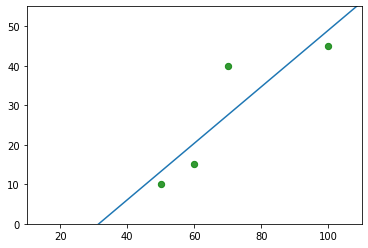

In [256]:
plt.xlim(X_min, X_max)
plt.ylim(0, y[:,0].max()+margin)
plt.scatter(X[:,1], y[:,0], 40, 'g', 'o', alpha=0.8)
plt.plot(X_Support, Y_model)

# plt.xscale=1
# plt.xscale=1
plt.show()

In [257]:
# variant 2
import numpy as np
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression

In [258]:
def ndprint(a, format_string='{0:.2f}'):
    """print list"""
    return [format_string.format(v,i) for i,v in enumerate(a)]

In [259]:
# features = dataset[:4, 0:1]
features=np.array([[1, 50],[1, 60],[1, 70],[1, 100]])
features

array([[  1,  50],
       [  1,  60],
       [  1,  70],
       [  1, 100]])

In [261]:
# y = dataset[:4, 1:2].T[0]
y=np.array([10, 15, 40, 45])
y

array([10, 15, 40, 45])

In [262]:
print('Matrix of object X features  (dimension: %s %s)' % features.shape)
print('\nTarget variable y (dimansion: %s)' % y.shape)

Matrix of object X features  (dimension: 4 2)

Target variable y (dimansion: 4)


In [263]:
w_analitic=inv(features.T.dot(features)).dot(features.T).dot(y)
print ("Analitically defined coefficients \n %s" % ndprint(w_analitic))

Analitically defined coefficients 
 ['-22.50', '0.71']


In [265]:
# variant 3 # coefficients may not coinside as they are approximate
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(features, y)
print("Coefficient calculate by sklearn \n%s" % ndprint(reg.coef_))

Coefficient calculate by sklearn 
['0.00', '0.71']
